# Парсинг и сбор даных с сайта

Возьмём сайт https://www.kinopoisk.ru, на нём представлена информация о разных врачах.

Скачаем эту информацию, чтобы обучить модель предсказывать положительные или отрицаельные отзывы по рецензиям к фильмам.


In [1]:
url_good = "https://www.kinopoisk.ru/reviews/type/comment/status/good/period/month/page/1/#list"
url_bad = 'https://www.kinopoisk.ru/reviews/'
url_test = 'https://www.kinopoisk.ru/reviews/type/comment/period/month/perpage/10/#list'

Для того, чтобы послать запрос можно воспользоваться библиотекой requests

http://docs.python-requests.org/en/master/

In [5]:
import requests

response = requests.get(url_test)

Получаем запрос по url-у

In [8]:
print(response)

<Response [200]>


In [9]:
print(type(response))

<class 'requests.models.Response'>


Посмотрим содержимое ответа

<!DOCTYPE html>
<!--[if lt IE 7]>     <html class="no-js lt-ie9 lt-ie8 lt-ie7 ie ie6" lang="ru"><![endif]-->
<!--[if IE 7]>        <html class="no-js lt-ie9 lt-ie8 ie ie7" lang="ru"><![endif]-->
<!--[if IE 8]>        <html class="no-js lt-ie9 ie ie8" lang="ru"><![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="ru"><!--<![endif]-->
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwQHUFJTGwIFV1FaAgQH"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split("
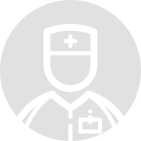
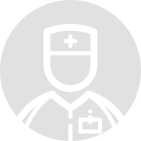
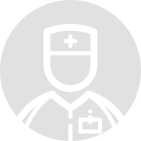
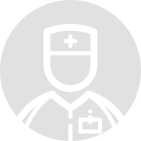
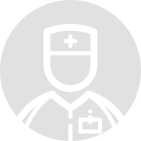
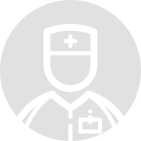
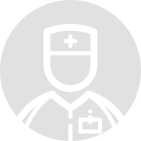
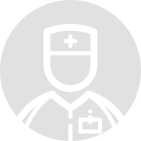
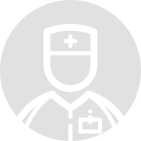
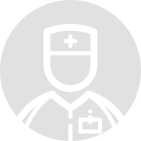

In [5]:
print(response.text)

Видим страницу в формате HTML

Подробнее про HTML можно почитать здесь: http://htmlbook.ru/

Парсить это вручную было бы очень сложно, есть специальная библиотека для парсинга HTML страниц

In [8]:
from bs4 import BeautifulSoup

Создаём вспомогательный объект для парсинга

In [9]:
bs4_object = BeautifulSoup(response.text, "html5lib")

In [10]:
bs4_object

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html dir="ltr" lang="ru-RU" prefix="og: http://ogp.me/ns# video: http://ogp.me/ns/video# ya: http://webmaster.yandex.ru/vocabularies/" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/"><head profile="http://gmpg.org/xfn/11">
<title>Рецензии пользователей на КиноПоиске</title>

    <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
    <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
    <meta content="121953784483000" property="fb:app_id"/>
    <meta content="#FF6600" name="msapplication-TileColor"/>
    <meta content="https://st8.kp.yandex.net/public/img/favicons/favicon-144.png" name="msapplication-TileImage"/>
    <meta content="Кинопоиск" name="application-name"/>
    <meta content="https://st2.kp.yandex.net/public/xml/ieconfig.xml" name="msapplication-config"/>
    <meta content="width=960" na

In [11]:
bs4_object.text

'\nРецензии пользователей на КиноПоиске\n\n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n\n\n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n\n    \n\n    \n    \n    \n    \n    \n    \n\n    \n    \n\n    \n    \n    \n\n            \n\n\n\n\n\n        (function(){\n        var pattern = /[<>]+/g;\n\n        function secureHash() {\n            if (!pattern.test(location.hash)) {\n                return;\n            }\n\n            history.replaceState(null, document.title, location.hash.replace(pattern, escape));\n        }\n\n        secureHash();\n        window.addEventListener(\'hashchange\', secureHash);\n    })();\n\n    function getTrailersDomain() {\n        return \'kp.cdn.yandex.net\';\n    }\n    function getStaticsDomain() {\n        return \'https://st.kp.yandex.net\';\n    }\n    function isKUB() {\n        return false;\n    }\n    function getUserLogin() {\n        return \'\';\n    }\n\n    window.KP = window.KP ||

Можем использовать разные системы поиска данных (по тегу, по классу и т.д.)

In [12]:
bs4_object.find_all("div", attrs={"class": "response good"})

[<div class="response good" id="div_review_2650584" itemscope="" itemtype="http://schema.org/Review">
     
     <meta content="Дети — это ангелы, только без крыльев" itemprop="headline"/>
 
     <div itemprop="author" itemscope="" itemtype="http://schema.org/Person">
         <img alt="Камила" itemprop="image" src="https://st.kp.yandex.net/images/no-poster.gif" title="Камила" width="52"/>
         <div>
             
                 <p class="profile_name"><s></s><a href="/user/3772982/" itemprop="name">FRIDMON</a></p>
                 <p class="film" itemprop="itemReviewed" itemscope="" itemtype="http://schema.org/Movie"><a href="/film/kamila-1980-419402/" itemprop="url"><span itemprop="name">Камила</span></a><b></b></p>
             
             <p class="sub_title" id="ext_title_2650584">Дети — это ангелы, только без крыльев</p>
         </div>
     </div>
 
    <table><tbody><tr><td>
       <div class="brand_words" onmousedown="clearSelect(2650584)" onmouseup="getSelect(2650584)

In [13]:
first_obj = bs4_object.find_all("div", attrs={"class": "response good"})[0]

In [14]:
type(first_obj)

bs4.element.Tag

Постепенно, при помощи разных поисков найдём нужные данные

In [15]:
first_obj.find("p", attrs={"class": "profile_name"}).text #Name of Author
first_obj.find("p", attrs={"class": "film"}).span.text #Name of film
first_obj.find("span", attrs={"class": "date"}).text #Date


'13 февраля 2018 | 06:53'

In [30]:
import re

In [45]:
text_film = first_obj.find("p", attrs={"class": "film"}).span.text
text_film
text_author = first_obj.find("p", attrs={"class": "profile_name"}).text
text_author
text_date = first_obj.find("span", attrs={"class": "date"}).text 
text_date
text_review = first_obj.find("div", attrs={"class": "brand_words"}).text 
text_review

'\n      Лантимос научился играть на\xa0смешанных чувствах. Однопутная колея от\xa0«Клыка» и\xa0«Лобстера» дошла до\xa0«Священного оленя», продолжая тему архаичного зоопарка среди названий фильмов. Новая лента греческого режиссёра наконец способна вызывать задуманную им\xa0двуполярность зрительского мнения\xa0—\xa0от крайнего до\xa0крайнего, пока сам\xa0он в\xa0момент чужой попытки осознания и\xa0категоризации чувств будет наслаждаться отснятыми дальними планами, длинными коридорными эстафетами и\xa0шепелявищими клавишами саспенсового синтезатора. \n\nГреческий режиссёр настолько вычурно пытается завуалировать демонстрацию алогичности и\xa0отсутствия собственных объяснений, что\xa0начинаешь рассматривать ленту не\xa0более, чем\xa0извращённую девиацию в\xa0адрес непознаваемости мирозданческих процессов. Особенно такое ощущение появляется с\xa0финальной сценой, где\xa0кроме жидкого «кроваво»-красного плюха и\xa0стакана воды на\xa0фоне пустых и\xa0глупых лиц, через которые можно увидеть в

In [39]:
parts = [p.strip() for p in text_date.split('|') if p != '']
parts

['12 февраля 2018', '10:52']

In [40]:
parts[0]

'12 февраля 2018'

Напишем итоговую функцию, извлекающую информацию

In [6]:
def extract_info(obj, assessment):
    text_film = first_obj.find("p", attrs={"class": "film"}).span.text

    text_author = first_obj.find("p", attrs={"class": "profile_name"}).text

    text_date = first_obj.find("span", attrs={"class": "date"}).text 
    parts = [p.strip() for p in text_date.split('|') if p != '']
    
    text_review = first_obj.find("div", attrs={"class": "brand_words"}).text 
    
    
    
    return {
        'film': text_film,
        'author': text_author,
        'date': parts[0],
        'review': text_review,
        'assessment': assessment,
    }


Проверим её работу на скаченной странице

In [48]:
for x in bs4_object.find_all("div", attrs={"class": "response good"}):
    print(extract_info(x))

{'film': 'Убийство священного оленя', 'author': 'schwelle', 'date': '12 февраля 2018', 'review': '\n      Лантимос научился играть на\xa0смешанных чувствах. Однопутная колея от\xa0«Клыка» и\xa0«Лобстера» дошла до\xa0«Священного оленя», продолжая тему архаичного зоопарка среди названий фильмов. Новая лента греческого режиссёра наконец способна вызывать задуманную им\xa0двуполярность зрительского мнения\xa0—\xa0от крайнего до\xa0крайнего, пока сам\xa0он в\xa0момент чужой попытки осознания и\xa0категоризации чувств будет наслаждаться отснятыми дальними планами, длинными коридорными эстафетами и\xa0шепелявищими клавишами саспенсового синтезатора. \n\nГреческий режиссёр настолько вычурно пытается завуалировать демонстрацию алогичности и\xa0отсутствия собственных объяснений, что\xa0начинаешь рассматривать ленту не\xa0более, чем\xa0извращённую девиацию в\xa0адрес непознаваемости мирозданческих процессов. Особенно такое ощущение появляется с\xa0финальной сценой, где\xa0кроме жидкого «кроваво»-

Для каждой страницы с докторами сделаем запрос, будем повторять, пока не получим плохой ответ

In [20]:
%%time
page_num = 0
kinopoisk = []

while True:
    page_num += 1 
    print ('page_num {}'.format(page_num))
    url = "https://www.kinopoisk.ru/reviews/type/comment/period/month/page/{}/#list".format(page_num)
          
    response = requests.get(url)
    if response.status_code != 200:
        break
    bs4_object = BeautifulSoup(response.text, "html5lib")
    for good in bs4_object.find_all("div", attrs={"class": "response good"}):
        kinopoisk.append(extract_info(good, 1))
    for bad in bs4_object.find_all("div", attrs={"class": "response bad"}):
        kinopoisk.append(extract_info(bad, -1))
    for neutral in bs4_object.find_all("div", attrs={"class": "response"}):
        kinopoisk.append(extract_info(neutral, 0))

page_num 1
page_num 2
page_num 3
page_num 4
page_num 5
page_num 6
page_num 7
page_num 8
page_num 9
page_num 10
page_num 11
page_num 12
page_num 13
page_num 14
page_num 15
page_num 16
page_num 17
page_num 18
page_num 19
page_num 20
page_num 21
page_num 22
page_num 23
page_num 24
page_num 25
page_num 26
page_num 27
page_num 28
page_num 29
page_num 30
page_num 31
Wall time: 53.8 s


Cохраним данные на диск в формате JSON

In [21]:
import json

with open('kinopoisk2.json', 'w') as f:
    json.dump(kinopoisk, f)

Есть более гиибкая библиотека scrapy, позволяющая более эффективно парсить сайте и имеющая встроенные дополнительные улучшения (задержка между запросами, логгирования, асинхронные запросы) для более гибкой настройки.

Если нужно собирать данные в промышленных мастабах, то лучше пользоваться scrapy, если задача небольшая, то проще использовать requests + BeautifulSoup.

Документация scrapy: https://docs.scrapy.org/en/latest/

In [22]:
import scrapy
kinopoisk_scrapy = []

class DoctorsSpider(scrapy.Spider):
    name = 'reviews'
    
    def __init__(self):
        self.domain = 'https://www.kinopoisk.ru' # нужно указать на какой домен будут запросы
        self.download_delay = 3. # задержка между запросами
        
    def start_requests(self):
        for page in range(1, 3): # сделаем запросы только на 50 страниц
            yield scrapy.Request("https://www.kinopoisk.ru/reviews/type/comment/period/month/page/{}/#list".format(page))
            
    def parse(self, response):
        # вообще у scrapy есть свой парсинг с поиском, но для простоты (и чтобы меньше кода менять) можно и так
        bs4_object = BeautifulSoup(response.body, "html5lib")
        for good in bs4_object.find_all("div", attrs={"class": "response good"}):
            kinopoisk_scrapy.append(extract_info(good, 1))
        for bad in bs4_object.find_all("div", attrs={"class": "response bad"}):
            kinopoisk_scrapy.append(extract_info(bad, -1))
        for neutral in bs4_object.find_all("div", attrs={"class": "response"}):
            kinopoisk_scrapy.append(extract_info(neutral, 0))
        

In [23]:
%%time
from scrapy.crawler import CrawlerRunner
from twisted.internet import reactor
from scrapy.utils.log import configure_logging

configure_logging()
runner = CrawlerRunner({'FEED_FORMAT': 'json', 'FEED_URI': 'doctors_scrapy.json', 'LOG_LEVEL': 'INFO'})
d = runner.crawl(DoctorsSpider)
d.addBoth(lambda _: reactor.stop())
reactor.run()

2018-02-13 18:22:38 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'doctors_scrapy.json', 'LOG_LEVEL': 'INFO'}
2018-02-13 18:22:39 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2018-02-13 18:22:39 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downl

Wall time: 6.52 s
